<h1 align="center"> Homework 11: Data Completion-Ensembling Model </h1>
<h3 align="center"> Last Update: 12/03/2021 </h3>
<h3 align="center"> Students: Vineela Bandi, Mark Chafin </h3>

##1. Read the dataset into a pandas DataFrame. Show the datatype of variables in the dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
train_dat = pd.read_csv("/content/drive/MyDrive/MS IST/DS and ML in Python/Module8/train_data.csv")
test_dat = pd.read_csv("/content/drive/MyDrive/MS IST/DS and ML in Python/Module8/test_data.csv")

In [3]:
train_dat.sample(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
655,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,9.09,0.0,0.0,0.000,0.719,0.000,0.000,0.000,0.0,1.000,1,4,0
1950,0.0,0.0,0.00,0.0,0.35,0.00,0.0,0.00,0.0,0.35,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,2.10,0.0,0.70,0.0,0.0,0.0,2.80,1.05,1.40,0.35,0.35,0.35,0.35,0.35,0.00,0.35,0.35,0.35,0.70,0.0,0.0,0.35,0.00,0.00,0.70,0.00,0.70,0.00,0.0,0.0,0.000,0.233,0.116,0.000,0.000,0.0,1.746,13,145,0
2728,0.0,0.0,0.33,0.0,0.66,0.00,0.0,0.33,0.0,1.32,0.0,0.00,0.00,0.33,0.0,0.0,0.33,0.0,1.32,0.0,0.33,0.0,0.0,0.0,1.98,0.66,0.66,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.99,0.0,0.0,0.00,0.00,0.00,0.33,0.33,0.33,0.00,0.0,0.0,0.168,0.392,0.000,0.224,0.336,0.0,4.115,42,321,0
516,0.0,0.0,0.44,0.0,0.00,0.44,0.0,0.00,0.0,0.00,0.0,0.00,0.44,0.00,0.0,0.0,0.00,0.0,2.67,0.0,0.89,0.0,0.0,0.0,0.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.44,0.00,0.0,0.0,0.00,0.44,0.00,0.00,0.00,0.44,0.00,0.0,0.0,0.000,0.074,0.000,0.149,0.000,0.0,1.115,2,29,0
348,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,3.72,0.00,0.00,0.0,0.0,0.00,0.0,3.10,0.0,0.00,0.0,0.0,0.0,0.62,0.00,0.00,0.00,1.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,1.24,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.110,0.000,0.000,0.000,0.0,1.470,8,50,0


In [4]:
test_dat.sample(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
902,0.00,0.00,0.32,0.0,0.64,0.64,0.64,0.32,0.00,0.0,0.0,0.32,0.32,0.0,0.0,0.32,0.32,0.32,2.27,0.0,3.24,0.0,0.0,0.32,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.00,0.0,0.0,0.0,0.156,0.0,0.000,0.156,0.0,1.688,19,157,1
951,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,3.63,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.9,3.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.153,0.000,0.0,1.933,7,58,0
1369,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,1.000,1,5,0
865,0.26,1.07,0.00,0.0,1.61,0.00,1.07,0.26,0.26,0.0,0.0,0.80,0.00,0.0,0.0,0.00,0.00,1.61,3.50,0.0,1.34,0.0,0.0,0.26,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.80,0.00,0.0,0.0,0.0,0.092,0.0,0.324,0.000,0.0,7.369,52,339,1
997,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,4.16,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.16,4.16,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,1.000,1,9,0


In [5]:
train_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              3220 non-null   float64
 1   word_freq_address           3220 non-null   float64
 2   word_freq_all               3220 non-null   float64
 3   word_freq_3d                3220 non-null   float64
 4   word_freq_our               3220 non-null   float64
 5   word_freq_over              3220 non-null   float64
 6   word_freq_remove            3220 non-null   float64
 7   word_freq_internet          3220 non-null   float64
 8   word_freq_order             3220 non-null   float64
 9   word_freq_mail              3220 non-null   float64
 10  word_freq_receive           3220 non-null   float64
 11  word_freq_will              3220 non-null   float64
 12  word_freq_people            3220 non-null   float64
 13  word_freq_report            3220 

In [6]:
test_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              1381 non-null   float64
 1   word_freq_address           1381 non-null   float64
 2   word_freq_all               1381 non-null   float64
 3   word_freq_3d                1381 non-null   float64
 4   word_freq_our               1381 non-null   float64
 5   word_freq_over              1381 non-null   float64
 6   word_freq_remove            1381 non-null   float64
 7   word_freq_internet          1381 non-null   float64
 8   word_freq_order             1381 non-null   float64
 9   word_freq_mail              1381 non-null   float64
 10  word_freq_receive           1381 non-null   float64
 11  word_freq_will              1381 non-null   float64
 12  word_freq_people            1381 non-null   float64
 13  word_freq_report            1381 

In [7]:
#summary statistics of train dataset
train_dat.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,0.099854,0.219792,0.284391,0.041627,0.306783,0.100839,0.112981,0.108127,0.087357,0.239550,0.060208,0.538217,0.094820,0.050960,0.048711,0.248795,0.143783,0.185702,1.660596,0.090025,0.805665,0.112348,0.097130,0.089326,0.545087,0.258071,0.817966,0.123457,0.099345,0.102658,0.060851,0.048152,0.102043,0.048932,0.104115,0.098155,0.133627,0.013736,0.076997,0.065071,0.039947,0.120705,0.045245,0.084677,0.303429,0.181649,0.005587,0.035149,0.039989,0.140453,0.016707,0.268132,0.072931,0.048461,5.213943,53.550311,285.312112,0.394099
std,0.285808,1.329902,0.504691,1.010729,0.654040,0.289473,0.402128,0.414894,0.255191,0.661345,0.200799,0.836783,0.297718,0.267195,0.260803,0.816513,0.445634,0.536368,1.775453,0.547965,1.182441,0.985118,0.339321,0.389735,1.705536,0.877701,3.490149,0.532749,0.596904,0.450942,0.349212,0.331636,0.587260,0.332598,0.548108,0.404493,0.417649,0.214616,0.420535,0.349375,0.344993,0.714601,0.218817,0.690045,1.049520,0.951394,0.078357,0.313863,0.251293,0.293065,0.111976,0.811123,0.223694,0.501323,33.335451,219.385696,621.036731,0.488732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.571000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [8]:
#summary statistics of test dataset
test_dat.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,1381.00000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.00000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000
mean,0.11551,0.197212,0.271948,0.120912,0.324909,0.084388,0.117067,0.098689,0.096387,0.239095,0.058928,0.549826,0.091854,0.076503,0.050355,0.248972,0.139797,0.182513,1.665605,0.075206,0.819312,0.141846,0.112172,0.105793,0.559804,0.282433,0.649182,0.128081,0.097915,0.103302,0.073852,0.044475,0.086003,0.045279,0.108436,0.095894,0.144707,0.011955,0.082433,0.06428,0.052339,0.159464,0.048088,0.066416,0.296083,0.175568,0.005112,0.024222,0.035277,0.135714,0.017604,0.271260,0.082526,0.034391,5.139220,48.960898,278.572773,0.393917
std,0.34655,1.194171,0.502937,2.025049,0.713815,0.232985,0.365437,0.366883,0.326793,0.604540,0.203344,0.917431,0.308733,0.455527,0.254306,0.847332,0.440501,0.518871,1.776184,0.407004,1.242970,1.114872,0.374526,0.546434,1.589337,0.908261,3.059694,0.552105,0.585114,0.469959,0.507780,0.321372,0.474840,0.322080,0.493511,0.398370,0.436736,0.234194,0.466110,0.35130,0.396436,0.876259,0.235116,0.422585,0.917777,0.809776,0.071208,0.205618,0.224230,0.208048,0.103159,0.826472,0.291102,0.167531,27.635828,119.688508,570.822166,0.488794
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.611000,6.000000,33.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [9]:
#splitting the output variable from the train and test data
train_X=train_dat.drop('class', axis=1)
train_y=train_dat['class']
test_X=test_dat.drop('class', axis=1)
test_y=test_dat['class']

In [10]:
train_X.shape

(3220, 57)

In [11]:
train_y.shape

(3220,)

In [12]:
test_X.shape

(1381, 57)

In [13]:
test_y.shape

(1381,)

In [14]:
# Normalize data
from sklearn import preprocessing
train_scale = preprocessing.MinMaxScaler().fit(train_X)
train_X_scale = pd.DataFrame(train_scale.transform(train_X),columns=train_X.columns)
train_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
word_freq_make,3220.0,0.023008,0.065854,0.0,0.000000,0.000000,0.000000,1.0
word_freq_address,3220.0,0.015392,0.093130,0.0,0.000000,0.000000,0.000000,1.0
word_freq_all,3220.0,0.062641,0.111165,0.0,0.000000,0.000000,0.094714,1.0
word_freq_3d,3220.0,0.001037,0.025186,0.0,0.000000,0.000000,0.000000,1.0
word_freq_our,3220.0,0.030678,0.065404,0.0,0.000000,0.000000,0.037000,1.0
word_freq_over,3220.0,0.017149,0.049230,0.0,0.000000,0.000000,0.000000,1.0
word_freq_remove,3220.0,0.015541,0.055313,0.0,0.000000,0.000000,0.000000,1.0
word_freq_internet,3220.0,0.009732,0.037344,0.0,0.000000,0.000000,0.000000,1.0
word_freq_order,3220.0,0.033729,0.098529,0.0,0.000000,0.000000,0.000000,1.0
word_freq_mail,3220.0,0.013177,0.036378,0.0,0.000000,0.000000,0.008251,1.0


In [15]:
test_X_scale = pd.DataFrame(train_scale.transform(test_X),columns=train_X.columns)
test_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
word_freq_make,1381.0,0.026615,0.079850,0.0,0.000000,0.000000,0.000000,1.046083
word_freq_address,1381.0,0.013810,0.083625,0.0,0.000000,0.000000,0.000000,1.000000
word_freq_all,1381.0,0.059900,0.110779,0.0,0.000000,0.000000,0.090308,1.123348
word_freq_3d,1381.0,0.003013,0.050462,0.0,0.000000,0.000000,0.000000,1.066783
word_freq_our,1381.0,0.032491,0.071382,0.0,0.000000,0.000000,0.043000,0.909000
word_freq_over,1381.0,0.014352,0.039623,0.0,0.000000,0.000000,0.000000,0.413265
word_freq_remove,1381.0,0.016103,0.050266,0.0,0.000000,0.000000,0.000000,0.561210
word_freq_internet,1381.0,0.008883,0.033023,0.0,0.000000,0.000000,0.000000,0.545455
word_freq_order,1381.0,0.037215,0.126175,0.0,0.000000,0.000000,0.000000,2.030888
word_freq_mail,1381.0,0.013152,0.033253,0.0,0.000000,0.000000,0.010451,0.611111


##2. K-NN

In [16]:
from sklearn import neighbors

# KNN: K=5, default measure of distance (euclidean)
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5, 
                                      weights='uniform', 
                                      algorithm='auto')

In [17]:
knn5.fit(train_X_scale, train_y)


KNeighborsClassifier()

In [18]:
pred_y_knn5 = knn5.predict(test_X_scale)

In [19]:
from sklearn import metrics

# Print confusion matrix
cm = metrics.confusion_matrix(test_y, pred_y_knn5)
print(cm)

[[779  58]
 [ 83 461]]


In [20]:
import matplotlib.pyplot as plt
import numpy as np
def print_cm(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']] 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

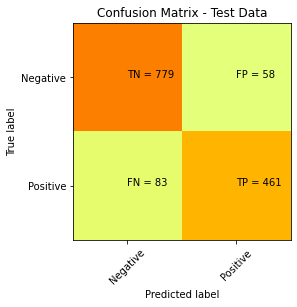

In [21]:
print_cm(cm)

In [22]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_knn5)

0.8979000724112962

In [23]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_knn5)

0.8890656845175345

In [24]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_knn5)

0.7844411406228724

In [25]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_knn5))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       837
           1       0.89      0.85      0.87       544

    accuracy                           0.90      1381
   macro avg       0.90      0.89      0.89      1381
weighted avg       0.90      0.90      0.90      1381



##3. Naive Bayes (Bernoulli Naive Bayes Classifier)

In [27]:
# Naive Bayes classifier for multivariate Bernoulli models
from sklearn import naive_bayes
bernou_nb = naive_bayes.BernoulliNB()

In [29]:
bernou_nb.fit(train_X, train_y)

BernoulliNB()

In [30]:
pred_y_bnb = bernou_nb.predict(test_X)

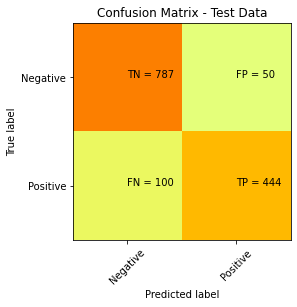

In [31]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_bnb))

In [32]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_bnb)

0.8913830557566981

In [33]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_bnb)

0.8782196570384426

In [34]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_bnb)

0.768807351736484

In [35]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_bnb))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       837
           1       0.90      0.82      0.86       544

    accuracy                           0.89      1381
   macro avg       0.89      0.88      0.88      1381
weighted avg       0.89      0.89      0.89      1381



## 4. Decision Tree Classifier

In [36]:
from sklearn import tree
# Decision trees for classification, use entropy criterion (gini by default)
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy')

In [37]:
# Import modules
import pydotplus
from IPython.display import Image

# Export the decision tree as a graphviz dot object
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=train_X.columns,
                                class_names= ['Good', 'Bad'],
                                filled=True, rounded=True,
                                special_characters=False)

# Convert the dot data into a graph
graph = pydotplus.graph_from_dot_data(dot_data)

In [38]:
# Show the graph
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [39]:
pred_y_dt = dt.predict(test_X)

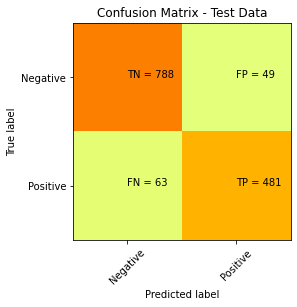

In [40]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_dt))

In [41]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_dt)

0.9188993482983345

In [42]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_dt)

0.9128243815447327

In [43]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_dt)

0.829384680890493

In [44]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_dt))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       837
           1       0.91      0.88      0.90       544

    accuracy                           0.92      1381
   macro avg       0.92      0.91      0.91      1381
weighted avg       0.92      0.92      0.92      1381



## 5. Random Forests

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Train an RF classifier
rf = RandomForestClassifier(n_estimators=100, max_features=10, random_state=123)

In [47]:
rf.fit(train_X,train_y)

RandomForestClassifier(max_features=10, random_state=123)

In [48]:
# Show feature importance
rf.feature_importances_

array([0.00259823, 0.00467675, 0.00715937, 0.00047883, 0.02401698,
       0.00820638, 0.08196732, 0.01071002, 0.00317804, 0.00722312,
       0.00671507, 0.01055819, 0.00303531, 0.00165455, 0.00079303,
       0.0752856 , 0.01460663, 0.00661651, 0.02423146, 0.00344806,
       0.04963242, 0.00274345, 0.02124812, 0.04418118, 0.04737078,
       0.0163386 , 0.02129353, 0.00594874, 0.00142645, 0.00304383,
       0.00143305, 0.00064267, 0.0029922 , 0.00078884, 0.00280964,
       0.00326576, 0.01174621, 0.00052243, 0.00272577, 0.00077661,
       0.00078109, 0.00542507, 0.00191798, 0.00148978, 0.00901049,
       0.01752603, 0.00019712, 0.00149529, 0.0041287 , 0.01262175,
       0.00203375, 0.12061511, 0.11854211, 0.00206704, 0.06477324,
       0.06160147, 0.03768425])

In [49]:
# Beautify the display of feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_X.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances

,importance
char_freq_!,0.120615
char_freq_$,0.118542
word_freq_remove,0.081967
word_freq_free,0.075286
capital_run_length_average,0.064773
capital_run_length_longest,0.061601
word_freq_your,0.049632
word_freq_hp,0.047371
word_freq_money,0.044181
capital_run_length_total,0.037684


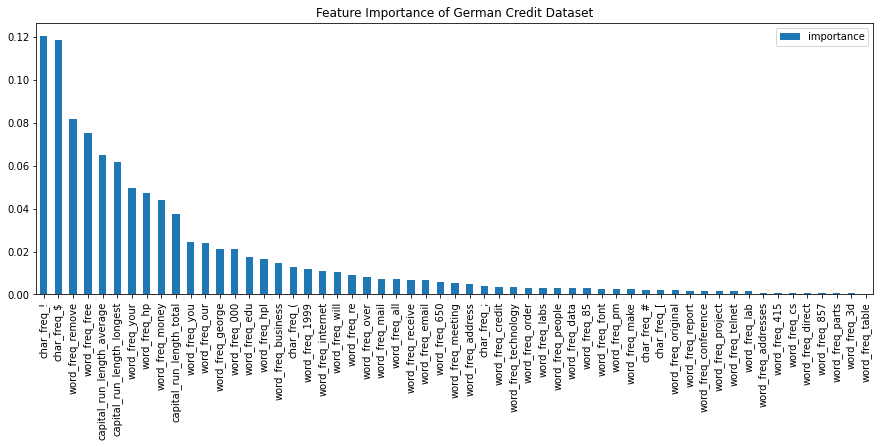

In [50]:
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance of German Credit Dataset')

In [52]:
# Predict on test set
pred_y_rf = rf.predict(test_X)

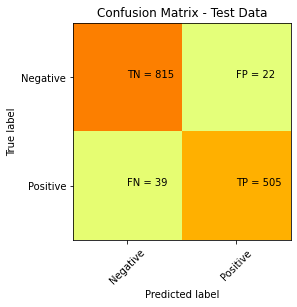

In [53]:
# Print confusion matrix
print_cm(metrics.confusion_matrix(test_y, pred_y_rf))

In [54]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y_rf)

0.9558291093410572

In [55]:
# Calculate AUC
metrics.roc_auc_score(test_y, pred_y_rf)

0.9510122373322089

In [56]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(test_y, pred_y_rf)

0.9069853976316007

In [57]:
# Print classification report
print(metrics.classification_report(test_y, pred_y_rf))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       837
           1       0.96      0.93      0.94       544

    accuracy                           0.96      1381
   macro avg       0.96      0.95      0.95      1381
weighted avg       0.96      0.96      0.96      1381



##6. Support Vector Machine

In [58]:
from sklearn import svm

In [59]:
# Train an SVC with linear kernel
svc_linear = svm.SVC(kernel='linear', C=1.0)

In [60]:
svc_linear.fit(train_X,train_y)

SVC(kernel='linear')

In [61]:
# Predict on test set
pred_y1 = svc_linear.predict(test_X)

In [62]:
# Count of the values in the test_y
test_y.value_counts()

0    837
1    544
Name: class, dtype: int64

In [63]:
# Count of the values in the pred_y
pd.Series(pred_y1).value_counts()

0    860
1    521
dtype: int64

In [64]:
# Print confusion matrix
print(metrics.confusion_matrix(test_y, pred_y1))

[[807  30]
 [ 53 491]]


In [65]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y1)

0.939898624185373

In [66]:
# Print classification report
print(metrics.classification_report(test_y, pred_y1))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       837
           1       0.94      0.90      0.92       544

    accuracy                           0.94      1381
   macro avg       0.94      0.93      0.94      1381
weighted avg       0.94      0.94      0.94      1381



In [67]:
acc = [metrics.accuracy_score(test_y, pred_y_knn5),
       metrics.accuracy_score(test_y, pred_y_bnb),
       metrics.accuracy_score(test_y, pred_y_dt),
       metrics.accuracy_score(test_y, pred_y_rf),
       metrics.accuracy_score(test_y, pred_y1)]

pre = [metrics.precision_score(test_y, pred_y_knn5, average='weighted'),
       metrics.precision_score(test_y, pred_y_bnb, average='weighted'),
       metrics.precision_score(test_y, pred_y_dt, average='weighted'),
       metrics.precision_score(test_y, pred_y_rf, average='weighted'),
       metrics.precision_score(test_y, pred_y1, average='weighted')]

rec = [metrics.recall_score(test_y, pred_y_knn5, average='weighted'),
       metrics.recall_score(test_y, pred_y_bnb, average='weighted'),
       metrics.recall_score(test_y, pred_y_dt, average='weighted'),
       metrics.recall_score(test_y, pred_y_rf, average='weighted'),
       metrics.recall_score(test_y, pred_y1, average='weighted')]

f1  = [metrics.f1_score(test_y, pred_y_knn5, average='weighted'),
       metrics.f1_score(test_y, pred_y_bnb, average='weighted'),
       metrics.f1_score(test_y, pred_y_dt, average='weighted'),
       metrics.f1_score(test_y, pred_y_rf, average='weighted'),
       metrics.f1_score(test_y, pred_y1, average='weighted')]

In [68]:
pd.DataFrame({'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 Score': f1},
             index = ['K-Nearest Neighbours','Bernouli Naive Bayes','Decision Tree','Random Forest','SVM'])

,Accuracy,Precision,Recall,F1 Score
K-Nearest Neighbours,0.897900,0.897620,0.897900,0.897451
Bernouli Naive Bayes,0.891383,0.891800,0.891383,0.890342
Decision Tree,0.918899,0.918713,0.918899,0.918707
Random Forest,0.955829,0.955877,0.955829,0.955701
SVM,0.939899,0.939966,0.939899,0.939657


##Using Ensemble model

###using 5 models

In [69]:
from sklearn.ensemble import VotingClassifier

In [70]:
#create a dictionary of our models
estimators=[('knn',knn5),('bnb',bernou_nb),('dt',dt),('rf',rf),('lsvc',svc_linear)]

In [71]:
#create voting classifier
ensemble=VotingClassifier(estimators, voting='hard')

In [72]:
#fit model
ensemble.fit(train_X, train_y)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('bnb', BernoulliNB()),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy')),
                             ('rf',
                              RandomForestClassifier(max_features=10,
                                                     random_state=123)),
                             ('lsvc', SVC(kernel='linear'))])

In [73]:
#test our model
ensemble.score(test_X, test_y)

0.946415640839971

###using 3 models

In [79]:
#create a dictionary of our models
estimators1=[('dt',dt),('rf',rf),('lsvc',svc_linear)]

In [80]:
#create voting classifier
ensemble=VotingClassifier(estimators1, voting='hard')

In [82]:
#fit model
ensemble.fit(train_X, train_y)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy')),
                             ('rf',
                              RandomForestClassifier(max_features=10,
                                                     random_state=123)),
                             ('lsvc', SVC(kernel='linear'))])

In [83]:
#test our model
ensemble.score(test_X, test_y)

0.9551049963794352

**This is the best accuracy found in Ensemble model (accuracy=0.9551049963794352)**

###using 2 models

In [85]:
#create a dictionary of our models
estimators2=[('rf',rf),('lsvc',svc_linear)]

In [86]:
#create voting classifier
ensemble=VotingClassifier(estimators2, voting='hard')

In [87]:
#fit model
ensemble.fit(train_X, train_y)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_features=10,
                                                     random_state=123)),
                             ('lsvc', SVC(kernel='linear'))])

In [88]:
#test our model
ensemble.score(test_X, test_y)

0.941346850108617